In [0]:
#!pip install Gudiya==0.1.1.4
#!pip install pytorch-gradcam

In [0]:
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:

import Model as Md
from TrainTestandUtils import TrainTestandUtils as Tt

In [4]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-yvr1_7_r
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-yvr1_7_r
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=b6103b143999eea111220e03fe3aef8f05170820f571da4165bb50ec4d746227
  Stored in directory: /tmp/pip-ephem-wheel-cache-96v6z5hx/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [0]:

from Albumentations import album_compose
from GradCAM import GradCAM
from Utils import *

In [0]:
a =album_compose()

In [7]:
from lr_finder import LRFinder

  pip install torch-lr-finder -v --global-option="amp"


In [8]:
transform = transforms.Compose(
    [ transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=a)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


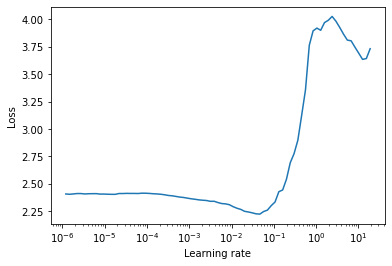

In [10]:

model = Md.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9,weight_decay=0.0004)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot()

In [0]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [0]:


model = Md.ResNet18().to(device)
#criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=0.95)#,weight_decay=0.0004)
scheduler = ReduceLROnPlateau(optimizer, 'min')
#scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)

new_model = Tt(model=model,
               device=device,
               optimizer=optimizer,
               criterion=criterion,
               scheduler=scheduler,
               trainloader=trainloader,
               testloader=testloader,
               epochs=50,
               input_size=(3,32,32),
               classes=classes)

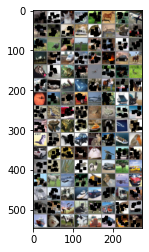

In [13]:
new_model.plot_train_images()

In [14]:
new_model.disp_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [15]:
new_model.runModel()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH  1


Loss=1.6760823726654053 Batch_id=390 Accuracy=32.97: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0120, Accuracy: 4156/10000 (41.56%)

EPOCH  2


Loss=1.237384557723999 Batch_id=390 Accuracy=46.75: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0101, Accuracy: 5315/10000 (53.15%)

EPOCH  3


Loss=0.9256189465522766 Batch_id=390 Accuracy=54.95: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 6155/10000 (61.55%)

EPOCH  4


Loss=1.2640736103057861 Batch_id=390 Accuracy=61.50: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 6844/10000 (68.44%)

EPOCH  5


Loss=0.812844455242157 Batch_id=390 Accuracy=66.22: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7323/10000 (73.23%)

EPOCH  6


Loss=0.801348090171814 Batch_id=390 Accuracy=70.29: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 7211/10000 (72.11%)

EPOCH  7


Loss=0.8330391645431519 Batch_id=390 Accuracy=73.41: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 7860/10000 (78.60%)

EPOCH  8


Loss=0.5765870213508606 Batch_id=390 Accuracy=75.94: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7926/10000 (79.26%)

EPOCH  9


Loss=0.4947054386138916 Batch_id=390 Accuracy=77.70: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 8038/10000 (80.38%)

EPOCH  10


Loss=0.5208236575126648 Batch_id=390 Accuracy=79.47: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0047, Accuracy: 7997/10000 (79.97%)

EPOCH  11


Loss=0.566848635673523 Batch_id=390 Accuracy=81.07: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8310/10000 (83.10%)

EPOCH  12


Loss=0.3684648871421814 Batch_id=390 Accuracy=82.21: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0041, Accuracy: 8296/10000 (82.96%)

EPOCH  13


Loss=0.2593628466129303 Batch_id=390 Accuracy=83.35: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8469/10000 (84.69%)

EPOCH  14


Loss=0.5256320834159851 Batch_id=390 Accuracy=84.35: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8521/10000 (85.21%)

EPOCH  15


Loss=0.4556151032447815 Batch_id=390 Accuracy=85.41: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8542/10000 (85.42%)

EPOCH  16


Loss=0.396902471780777 Batch_id=390 Accuracy=85.90: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8543/10000 (85.43%)

EPOCH  17


Loss=0.40314775705337524 Batch_id=390 Accuracy=86.96: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8551/10000 (85.51%)

EPOCH  18


Loss=0.4003823399543762 Batch_id=390 Accuracy=87.49: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8679/10000 (86.79%)

EPOCH  19


Loss=0.28565871715545654 Batch_id=390 Accuracy=88.20: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 8712/10000 (87.12%)

EPOCH  20


Loss=0.38049355149269104 Batch_id=390 Accuracy=88.55: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8696/10000 (86.96%)

EPOCH  21


Loss=0.28943079710006714 Batch_id=390 Accuracy=89.28: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8676/10000 (86.76%)

EPOCH  22


Loss=0.31903713941574097 Batch_id=390 Accuracy=89.73: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8679/10000 (86.79%)

EPOCH  23


Loss=0.22543127834796906 Batch_id=390 Accuracy=90.45: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8741/10000 (87.41%)

EPOCH  24


Loss=0.40218353271484375 Batch_id=390 Accuracy=90.85: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8738/10000 (87.38%)

EPOCH  25


Loss=0.3314029574394226 Batch_id=390 Accuracy=91.13: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8702/10000 (87.02%)

EPOCH  26


  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8802/10000 (88.02%)

EPOCH  27


Loss=0.30532413721084595 Batch_id=390 Accuracy=91.70: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8798/10000 (87.98%)

EPOCH  28


Loss=0.19828061759471893 Batch_id=390 Accuracy=92.16: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8847/10000 (88.47%)

EPOCH  29


Loss=0.2518334984779358 Batch_id=390 Accuracy=92.46: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8825/10000 (88.25%)

EPOCH  30


Loss=0.15093618631362915 Batch_id=390 Accuracy=92.79: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8822/10000 (88.22%)

EPOCH  31


Loss=0.15489304065704346 Batch_id=390 Accuracy=94.63: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0029, Accuracy: 9008/10000 (90.08%)

EPOCH  32


Loss=0.1256944090127945 Batch_id=390 Accuracy=95.45: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0031, Accuracy: 9037/10000 (90.37%)

EPOCH  33


Loss=0.12221326678991318 Batch_id=390 Accuracy=95.58: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0030, Accuracy: 9038/10000 (90.38%)

EPOCH  34


Loss=0.14751146733760834 Batch_id=390 Accuracy=95.95: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0031, Accuracy: 9041/10000 (90.41%)

EPOCH  35


Loss=0.13851046562194824 Batch_id=390 Accuracy=96.17: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0031, Accuracy: 9052/10000 (90.52%)

EPOCH  36


Loss=0.20438846945762634 Batch_id=390 Accuracy=96.01: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0031, Accuracy: 9020/10000 (90.20%)

EPOCH  37


Loss=0.08393682539463043 Batch_id=390 Accuracy=96.32: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 9011/10000 (90.11%)

EPOCH  38


Loss=0.05007056146860123 Batch_id=390 Accuracy=96.47: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 9054/10000 (90.54%)

EPOCH  39


Loss=0.13066589832305908 Batch_id=390 Accuracy=96.48: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0031, Accuracy: 9060/10000 (90.60%)

EPOCH  40


Loss=0.05362096428871155 Batch_id=390 Accuracy=96.52: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 9047/10000 (90.47%)

EPOCH  41


Loss=0.11025027185678482 Batch_id=390 Accuracy=96.64: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 9047/10000 (90.47%)

EPOCH  42


Loss=0.07457362860441208 Batch_id=390 Accuracy=96.70: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 9026/10000 (90.26%)

EPOCH  43


Loss=0.03837912157177925 Batch_id=390 Accuracy=96.85: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 9038/10000 (90.38%)

EPOCH  44


Loss=0.2259095162153244 Batch_id=390 Accuracy=96.72: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 9044/10000 (90.44%)

EPOCH  45


Loss=0.08346675336360931 Batch_id=390 Accuracy=96.79: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 9054/10000 (90.54%)

EPOCH  46


Loss=0.09349432587623596 Batch_id=390 Accuracy=96.82: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 9063/10000 (90.63%)

EPOCH  47


Loss=0.22835645079612732 Batch_id=390 Accuracy=96.90: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 9059/10000 (90.59%)

EPOCH  48


Loss=0.16678284108638763 Batch_id=390 Accuracy=96.80: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 9071/10000 (90.71%)

EPOCH  49


Loss=0.11216829717159271 Batch_id=390 Accuracy=96.83: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0032, Accuracy: 9062/10000 (90.62%)

EPOCH  50


Loss=0.028103500604629517 Batch_id=390 Accuracy=96.83: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]


Test set: Average loss: 0.0032, Accuracy: 9068/10000 (90.68%)



In [0]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
from Utils import change, visualize_cam, imshow, plot_images


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/content/Misclassified_image.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


<Figure size 5400x5400 with 0 Axes>

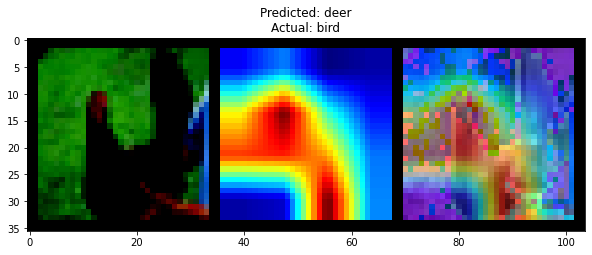

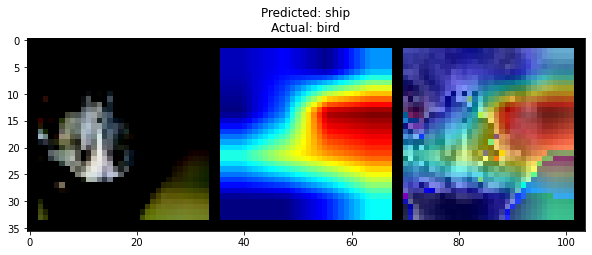

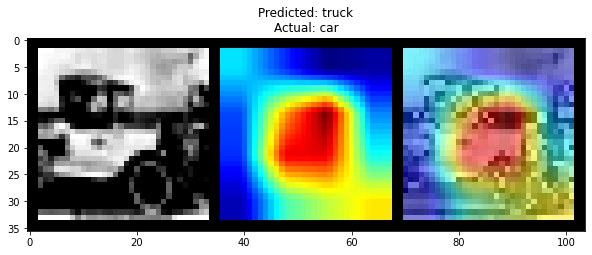

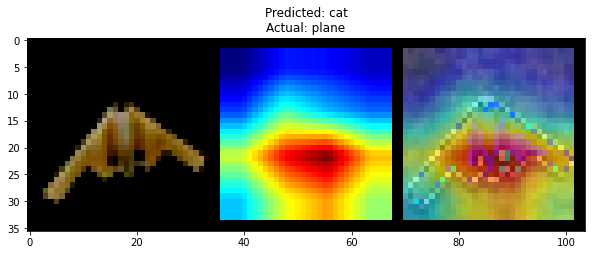

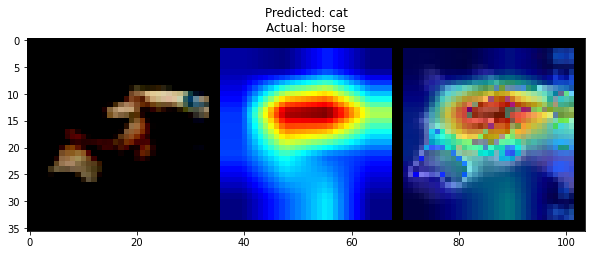

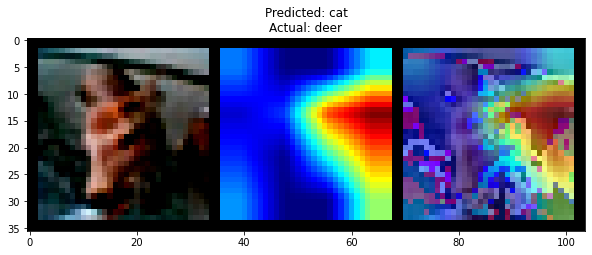

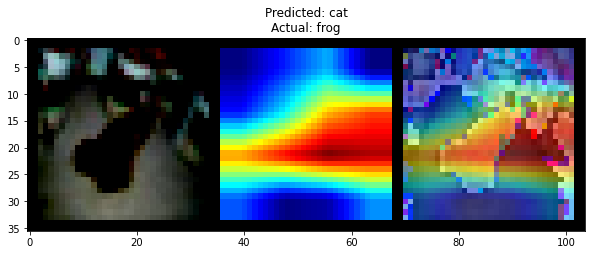

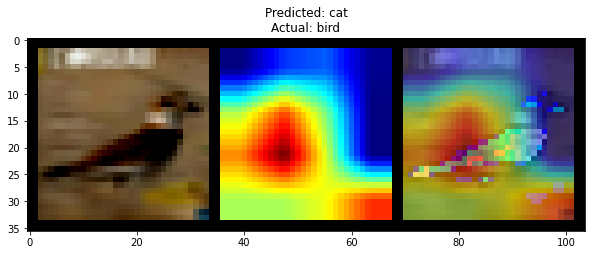

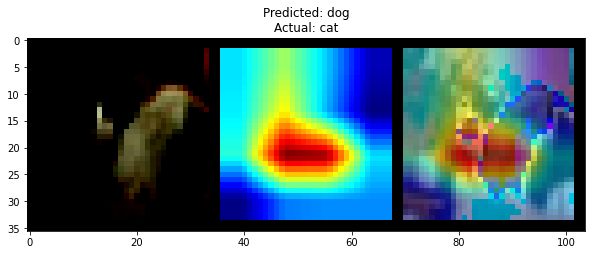

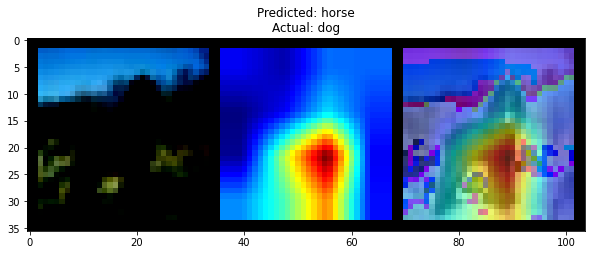

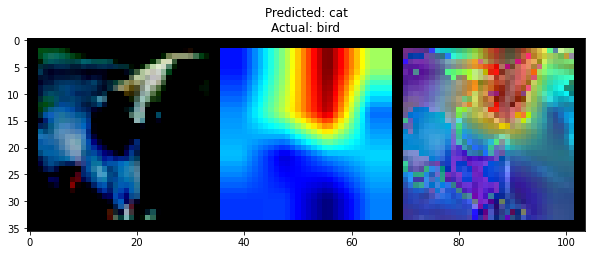

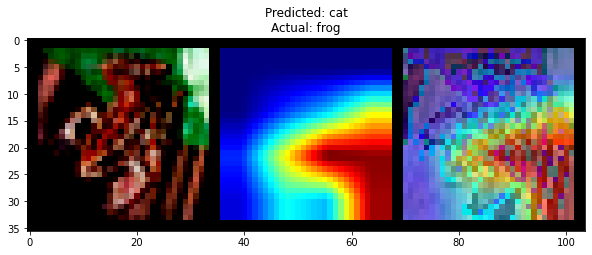

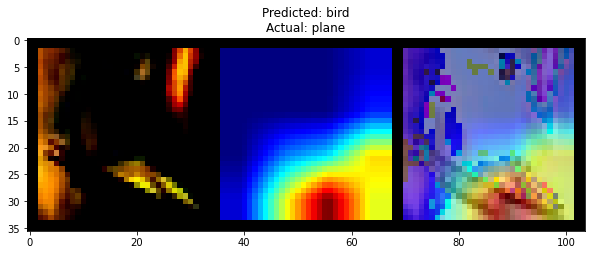

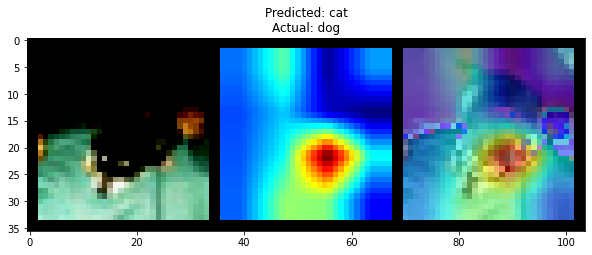

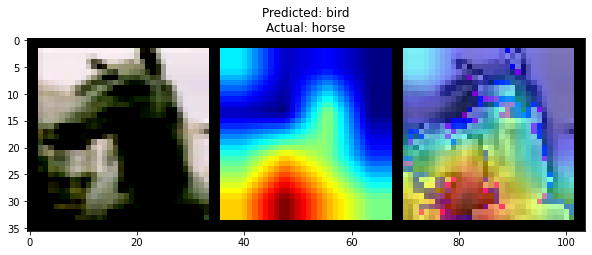

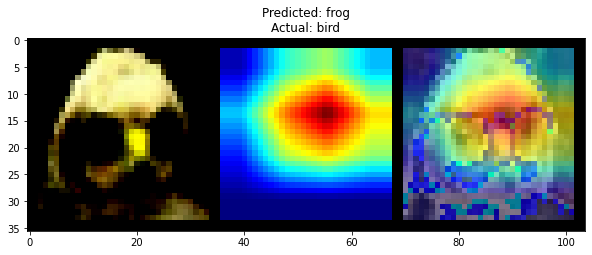

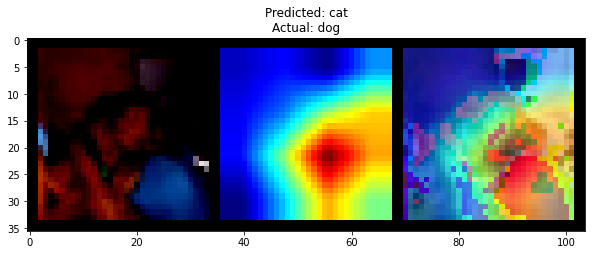

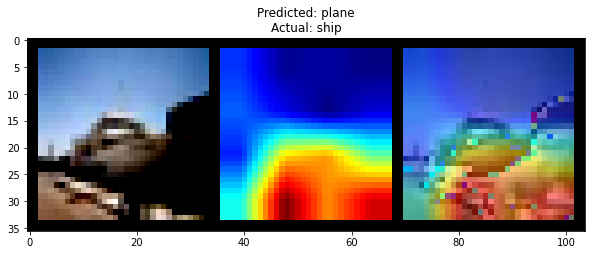

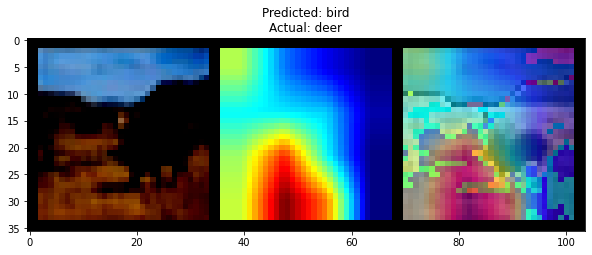

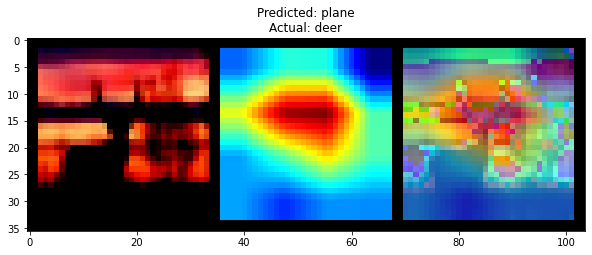

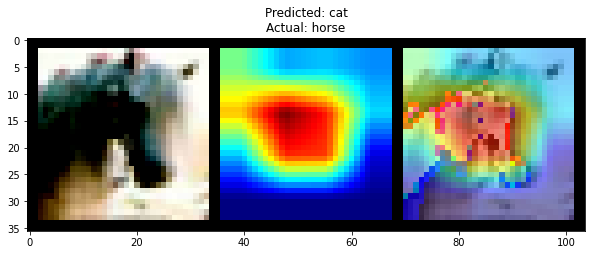

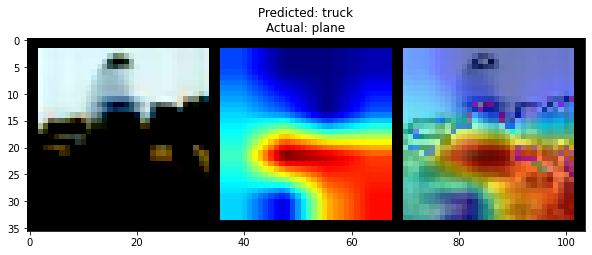

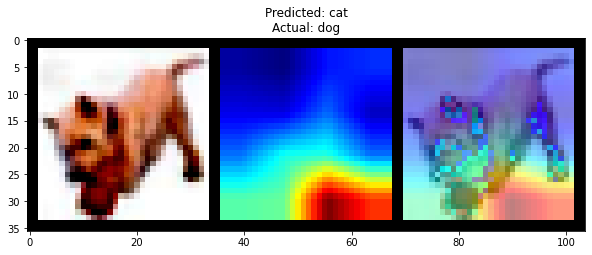

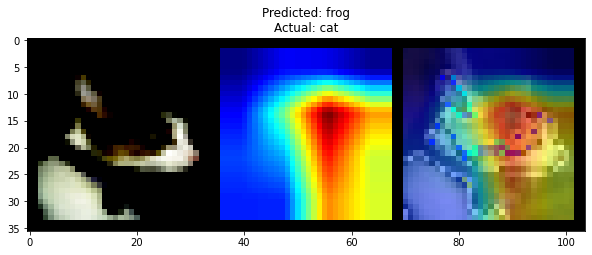

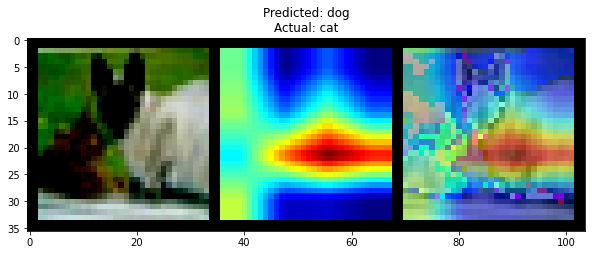

In [24]:
# Displaying the Misclassified images, heatmaps and their results

import Misclassified_image as MC
MC.gradcam_misclassified(new_model.misclassified_images,model,device)

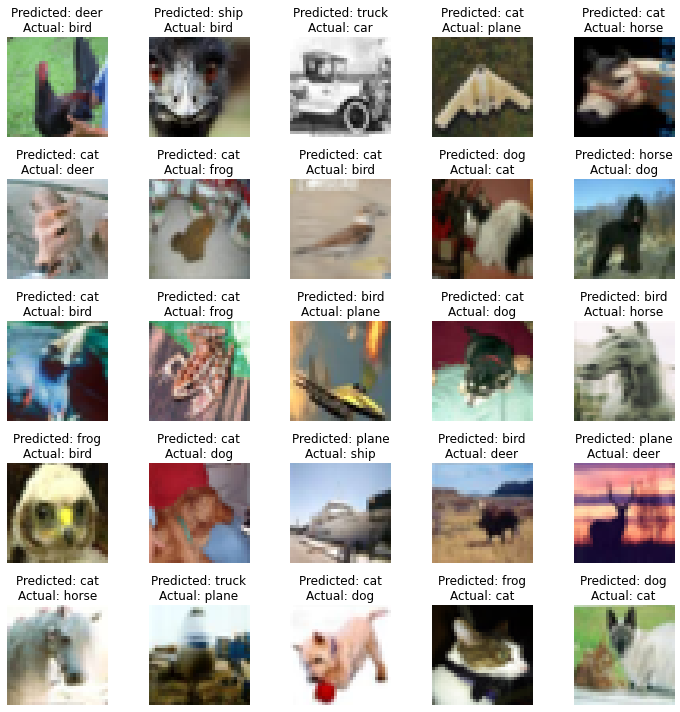

In [25]:
new_model.plot_misclassified('mis.jpg')

In [26]:
new_model.total_accuracy()

Accuracy of the network on the 10000 test images: 90 %


In [27]:
new_model.classwise_acc()


Accuracy of plane : 89 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 73 %
Accuracy of  deer : 92 %
Accuracy of   dog : 81 %
Accuracy of  frog : 91 %
Accuracy of horse : 80 %
Accuracy of  ship : 96 %
Accuracy of truck : 94 %



Length of train acc is 50
Length of test acc is 50


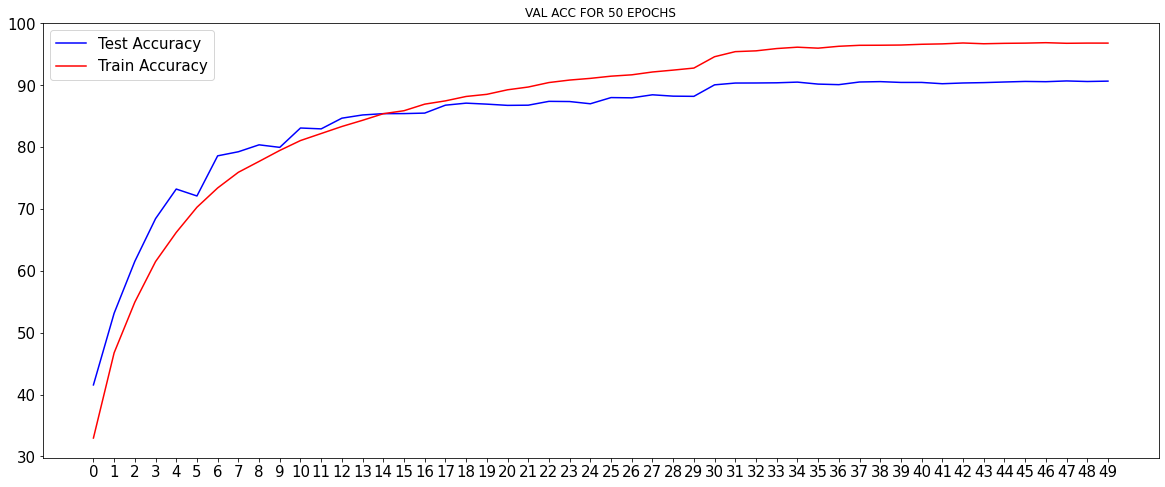

In [28]:
new_model.plot_train_test_acc()